# Chapter6 : classification - model Training and evaluation

## KNN - algorithm

In [19]:
import pandas as pd
df = pd.read_csv('csv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)
print(y.shape, x.shape)

(768,) (768, 8)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors = 15)
model = nn.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


In [25]:
dataframe = pd.DataFrame({'y': y_test, 'y_pred': y_pred})
dataframe

,y,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [26]:
dataframe.to_csv('diabetes_data.csv')

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.7597402597402597


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[84, 15],
       [22, 33]], dtype=int64)

In [29]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN, FP, FN, TP)

84 15 22 33


### Sensitivity & Specificity
- measures the propotion of TP examples of positive cases which were correctly classified
- sensitivity = TP/(TP + FN)
- Specificity = TN/(TN + FP)

In [30]:
from sklearn.metrics import recall_score
print("Sensitivity: ", recall_score(y_test, y_pred))
print('Specificity: ', recall_score(y_test, y_pred, pos_label = 0))

Sensitivity:  0.6
Specificity:  0.8484848484848485


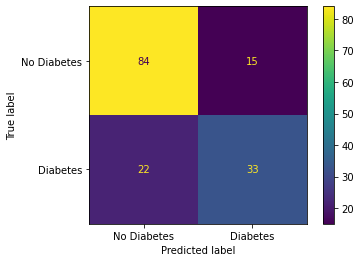

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No Diabetes', 'Diabetes'])
cm_display.plot()
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('csv/tshirt.csv')
df

,Height,Wight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  18 non-null     int64 
 1   Wight   18 non-null     int64 
 2   Size    18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
y = df['Size']
x = df.drop('Size', axis=1)
print(x.shape, y.shape)

(18, 2) (18,)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(14, 2) (4, 2) (14,) (4,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors = 5)
model = nn.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

['M' 'M' 'L' 'M']
